In [2]:
import uproot
import pandas as pd
import numpy as np
import boost_histogram as bh
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
folder = '/eos/atlas/atlascerngroupdisk/perf-egamma/InclusivePhotons'
branches = ['evtWeight', 'y_passOQ', 'y_pt', 'y_eta', 'y_isTruthMatchedPhoton', 'y_Rhad']

In [4]:
df_photon = uproot.open(folder+'/mc21_gammajet_v02/PyPt17_mc21_800664.root', entrystop=1000)['SinglePhoton'].arrays(branches,library="pd")

In [5]:
df_photon#.head()

,evtWeight,y_passOQ,y_pt,y_eta,y_isTruthMatchedPhoton,y_Rhad
0,1.0,True,409.209595,1.753538,True,0.004472
1,1.0,True,315.108459,0.265245,True,0.008007
2,1.0,True,470.509003,1.089436,True,-0.003068
3,1.0,True,317.702118,-0.267235,True,0.009505
4,1.0,True,292.126465,0.317192,True,0.001446
...,...,...,...,...,...,...
2373008,1.0,True,323.109375,-1.064562,True,0.002735
2373009,1.0,True,294.888763,-1.888014,True,-0.000262
2373010,1.0,True,342.173950,1.197824,True,-0.001742
2373011,1.0,True,456.778595,-1.523358,True,0.006766


### $\gamma$_R$_{had}$ histogram

In [33]:

hist_1 = bh.Histogram(bh.axis.Regular(200,-.5,5),storage=bh.storage.Weight()) 
hist_1.fill(df_photon.y_Rhad, weight=df_photon.evtWeight)

Histogram(Regular(200, -0.5, 5), storage=Weight()) # Sum: WeightedSum(value=2.3724e+06, variance=2.3724e+06) (WeightedSum(value=2.37301e+06, variance=2.37301e+06) with flow)

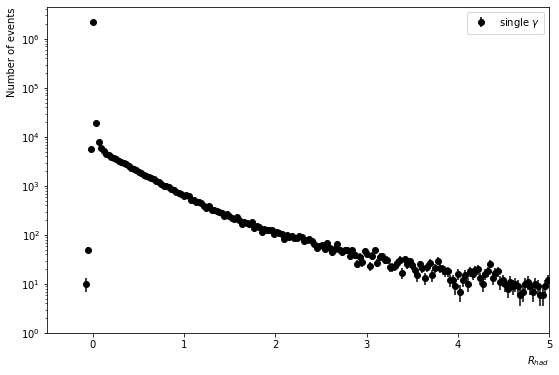

In [34]:
plt.close('all')
plt.figure(figsize=(9,6))
# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.errorbar(hist_1.axes[0].centers, hist_1.view().value, yerr=np.sqrt(hist_1.view().variance),
         fmt='r.',mec='black',mfc='black',ecolor='black',ms=12,label=r'single $\gamma$')

ax = plt.gca()
ax.set_xlabel(r"$R_{had}$",position=(1,1),horizontalalignment='right')
ax.set_ylabel("Number of events",position=(0,1),horizontalalignment='right')
ax.legend()
plt.yscale('log')

top = 2*max(hist_1.view().value)
bottom = 1;
left = -.5; right = 5
ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)

# ax.text((right-left)*0.02+left, (top-bottom)*0.9+bottom, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
# ax.text((right-left)*0.165+left, (top-bottom)*0.9+bottom, 'Simulation Internal',fontsize=20,horizontalalignment='left')
# ax.text((right-left)*0.02+left, (top-bottom)*0.8+bottom, r'$\sqrt{s} =$'+'13.6 TeV, xx fb'+r'$^{-1}$',fontsize=20,horizontalalignment='left')

plt.show()

why are there some counts at negative R_had, but only very small negative R_had?

is this a physics thing? like you're not going to have more energy deposited in had. calorimeter than EMcal for a photon?

but where does a negative come from for a ratio? (neg. reading in had. calorimemter?)

In [8]:
photonfile = uproot.open(folder+'/mc21_gammajet_v02/PyPt17_mc21_800664.root', entrystop=1000)

# photonfile['SinglePhoton'].fBranches
# photonfile['SinglePhoton'].typenames()

singlephot = photonfile['SinglePhoton']

# singlephot.arrays?

In [10]:
# singlephot.arrays(branches,library='np')

### y_pt historgram

In [11]:
hist_pt = bh.Histogram(bh.axis.Regular(200,0,600),storage=bh.storage.Weight()) 
hist_pt.fill(df_photon.y_pt, weight=df_photon.evtWeight)

Histogram(Regular(200, 0, 600), storage=Weight()) # Sum: WeightedSum(value=2.37295e+06, variance=2.37295e+06) (WeightedSum(value=2.37301e+06, variance=2.37301e+06) with flow)

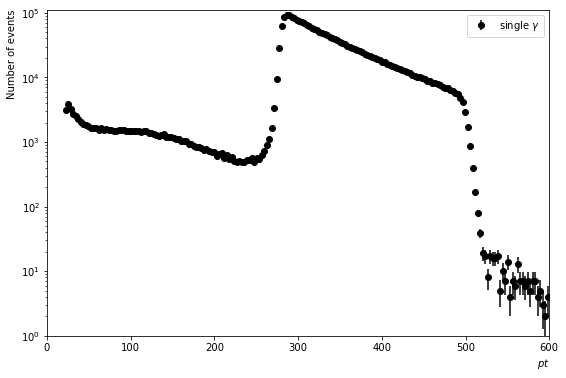

In [12]:
plt.close('all')
plt.figure(figsize=(9,6))
# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.errorbar(hist_pt.axes[0].centers, hist_pt.view().value, yerr=np.sqrt(hist_pt.view().variance),
         fmt='r.',mec='black',mfc='black',ecolor='black',ms=12,label=r'single $\gamma$')

ax = plt.gca()
ax.set_xlabel(r"$pt$",position=(1,1),horizontalalignment='right')
ax.set_ylabel("Number of events",position=(0,1),horizontalalignment='right')
ax.legend()
plt.yscale('log')

top = 1.2*max(hist_pt.view().value)
bottom = 1;
left = 0; right = 600
ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)

# ax.text((right-left)*0.02+left, (top-bottom)*0.9+bottom, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
# ax.text((right-left)*0.165+left, (top-bottom)*0.9+bottom, 'Simulation Internal',fontsize=20,horizontalalignment='left')
# ax.text((right-left)*0.02+left, (top-bottom)*0.8+bottom, r'$\sqrt{s} =$'+'13.6 TeV, xx fb'+r'$^{-1}$',fontsize=20,horizontalalignment='left')

plt.show()

is pt related to the energy?

and this is one of the slices?

### histogram of photon $\eta$

In [13]:
hist_eta = bh.Histogram(bh.axis.Regular(100,-3,3),storage=bh.storage.Weight()) 
hist_eta.fill(df_photon.y_eta, weight=df_photon.evtWeight)

Histogram(Regular(100, -3, 3), storage=Weight()) # Sum: WeightedSum(value=2.37301e+06, variance=2.37301e+06)

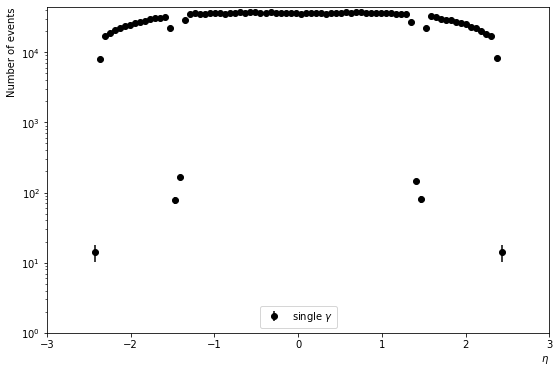

In [14]:
plt.close('all')
plt.figure(figsize=(9,6))
# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.errorbar(hist_eta.axes[0].centers, hist_eta.view().value, yerr=np.sqrt(hist_eta.view().variance),
         fmt='r.',mec='black',mfc='black',ecolor='black',ms=12,label=r'single $\gamma$')

ax = plt.gca()
ax.set_xlabel(r"$\eta$",position=(1,1),horizontalalignment='right')
ax.set_ylabel("Number of events",position=(0,1),horizontalalignment='right')
ax.legend()
plt.yscale('log')

top = 1.2*max(hist_eta.view().value)
bottom = 1;
left = -3; right = 3
ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)

# ax.text((right-left)*0.02+left, (top-bottom)*0.9+bottom, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
# ax.text((right-left)*0.165+left, (top-bottom)*0.9+bottom, 'Simulation Internal',fontsize=20,horizontalalignment='left')
# ax.text((right-left)*0.02+left, (top-bottom)*0.8+bottom, r'$\sqrt{s} =$'+'13.6 TeV, xx fb'+r'$^{-1}$',fontsize=20,horizontalalignment='left')

plt.show()

interesting pattern, is this to do with the location of the detectors? Like gap between end caps and others

also, eta is starting from 0 at at vertical, right? (even tho images show starting from horzontal (along beam))

# Now other photon variables

look at paper, etc. and match labels of branches

then do jet-gamma vs. jet-jet

In [15]:
# branch labels:
available_btanches = singlephot.keys()

['mcid',
 'mcWeight',
 'xs',
 'kf',
 'ge',
 'nEvents',
 'intLumi',
 'evtWeight',
 'evtWeightNoPU',
 'xsecWeight',
 'puWeight',
 'puWeight_down',
 'puWeight_up',
 'trigpuWeight',
 'beamSpotSize_weight',
 'yWeight',
 'PRWHash',
 'lumiXsecWeightOriginal',
 'dataWeightPtBin',
 'dataWeightPtBinNoMu',
 'dataPrescale',
 'dataWeightThreshold',
 'dataWeightThresholdNoMu',
 'acceptEventThreshold',
 'acceptEventPtBin',
 'evt_lb',
 'evt_runNo',
 'evt_eventNo',
 'evt_mu',
 'evt_npv',
 'y_n',
 'y_passOQ',
 'y_pt',
 'y_eta',
 'y_phi',
 'y_phi_cl',
 'y_e',
 'y_pt_cl',
 'y_eta_cl',
 'y_e_cl',
 'y_eta_cl_s2',
 'y_eta_cl_s1',
 'y_convType',
 'y_convRadius',
 'y_isTruthMatchedPhoton',
 'y_truth_convType',
 'y_truth_convRadius',
 'y_truth_type',
 'y_truth_origin',
 'y_truth_pt',
 'y_truth_eta',
 'y_truth_phi',
 'y_truth_e',
 'y_truth_pdgId',
 'y_truth_mother_pdgId',
 'y2_pt',
 'y2_eta',
 'y2_phi',
 'y2_e',
 'y2_convType',
 'y2_convRadius',
 'y_ptcone20',
 'y_ptcone40',
 'y_topoetcone20',
 'y_topoetcone30',

In [16]:
#from paper:
branchnames = ['y_Reta', 'y_weta2', 'y_Rphi', 'y_wtots1', 'y_Eratio', 'y_f1']
#y_ws3?  y_fside? y_DeltaEs?  

In [17]:
##^ look at what they represent^

# Comparing gamma-jet to jet-jet

In [20]:
gamjetbranches = branches+branchnames

In [21]:
gamjet_df = singlephot.arrays(gamjetbranches, library='pd')

In [22]:
gamjet_df

,evtWeight,y_passOQ,y_pt,y_eta,y_isTruthMatchedPhoton,y_Rhad,y_Reta,y_weta2,y_Rphi,y_wtots1,y_Eratio,y_f1
0,1.0,True,409.209595,1.753538,True,0.004472,0.964968,0.009346,0.978234,2.002914,0.989079,0.081320
1,1.0,True,315.108459,0.265245,True,0.008007,0.975056,0.008734,0.988232,1.719431,0.989451,0.097205
2,1.0,True,470.509003,1.089436,True,-0.003068,0.961069,0.010051,0.966097,2.142255,0.998809,0.218940
3,1.0,True,317.702118,-0.267235,True,0.009505,0.976663,0.008390,0.984343,1.783198,0.939906,0.056986
4,1.0,True,292.126465,0.317192,True,0.001446,0.970260,0.008896,0.981166,1.699356,0.995281,0.196796
...,...,...,...,...,...,...,...,...,...,...,...,...
2373008,1.0,True,323.109375,-1.064562,True,0.002735,0.961619,0.009865,0.973804,2.317394,0.990079,0.178485
2373009,1.0,True,294.888763,-1.888014,True,-0.000262,0.943420,0.010265,0.965883,1.660011,0.987520,0.240984
2373010,1.0,True,342.173950,1.197824,True,-0.001742,0.960052,0.009196,0.974733,2.107327,0.990309,0.051357
2373011,1.0,True,456.778595,-1.523358,True,0.006766,0.973274,0.008938,0.983277,1.997238,0.993593,0.098071


In [23]:
#now for jetjet:
jetjetfile = uproot.open(folder+'/mc21_jetjet_v02/Py8_jetjet_mc21_801279_p5057_Rel22_AB22.2.50_v02.root', entrystop=1000)

In [26]:
jetjet_SP = jetjetfile['SinglePhoton']
jetjet_df = jetjet_SP.arrays(gamjetbranches, library='pd')

In [27]:
jetjet_df

,evtWeight,y_passOQ,y_pt,y_eta,y_isTruthMatchedPhoton,y_Rhad,y_Reta,y_weta2,y_Rphi,y_wtots1,y_Eratio,y_f1
0,1.0,True,24.023392,1.089871,True,0.040991,0.988864,0.010117,0.978020,2.126362,0.967211,0.221742
1,1.0,True,39.399208,0.972699,False,0.001513,0.962467,0.009591,0.959565,2.494230,0.865542,0.244460
2,1.0,True,19.430300,1.831029,False,-0.001615,0.770610,0.016360,0.942202,4.090830,0.052267,0.354223
3,1.0,True,51.272476,-1.860791,False,-0.008309,0.935846,0.011111,0.914650,1.777548,0.973203,0.227194
4,1.0,True,29.251623,-1.178138,False,0.009378,0.931706,0.010634,0.946471,3.489056,0.048322,0.286198
...,...,...,...,...,...,...,...,...,...,...,...,...
532789,1.0,True,35.467777,0.535228,False,0.010356,0.963726,0.009265,0.853047,3.015149,0.012008,0.303379
532790,1.0,True,26.813547,-2.078789,True,-0.006719,0.933606,0.011496,0.948996,1.256975,0.963583,0.250500
532791,1.0,True,25.979445,-0.427861,True,-0.028259,0.916155,0.010416,0.973931,2.561163,0.875877,0.260899
532792,1.0,True,35.109184,1.003924,False,-0.017902,0.949494,0.009419,0.967284,2.458275,0.967088,0.305182


In [28]:
#

In [31]:
#first, lets try y_Rhad from jetjet to compare to gamjet
hist_2 = bh.Histogram(bh.axis.Regular(200,-.5,5),storage=bh.storage.Weight()) 
hist_2.fill(jetjet_df.y_Rhad, weight=jetjet_df.evtWeight)

Histogram(Regular(200, -0.5, 5), storage=Weight()) # Sum: WeightedSum(value=532724, variance=532724) (WeightedSum(value=532794, variance=532794) with flow)

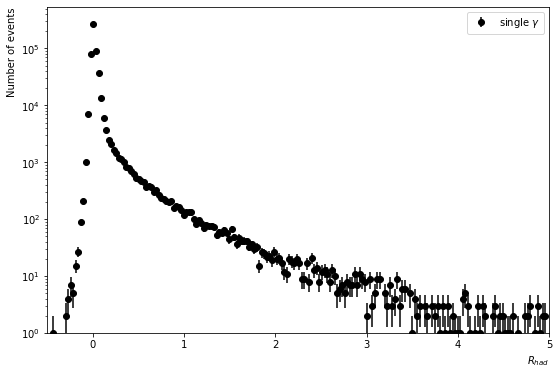

In [32]:
plt.close('all')
plt.figure(figsize=(9,6))
# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.errorbar(hist_2.axes[0].centers, hist_2.view().value, yerr=np.sqrt(hist_2.view().variance),
         fmt='r.',mec='black',mfc='black',ecolor='black',ms=12,label=r'single $\gamma$')

ax = plt.gca()
ax.set_xlabel(r"$R_{had}$",position=(1,1),horizontalalignment='right')
ax.set_ylabel("Number of events",position=(0,1),horizontalalignment='right')
ax.legend()
plt.yscale('log')

top = 2*max(hist_2.view().value)
bottom = 1;
left = -.5; right = 5
ax.set_ylim(bottom=bottom); ax.set_ylim(top=top); ax.set_xlim(left=left); ax.set_xlim(right=right)

# ax.text((right-left)*0.02+left, (top-bottom)*0.9+bottom, 'ATLAS',style = 'italic',fontweight='bold',fontsize=20,horizontalalignment='left')
# ax.text((right-left)*0.165+left, (top-bottom)*0.9+bottom, 'Simulation Internal',fontsize=20,horizontalalignment='left')
# ax.text((right-left)*0.02+left, (top-bottom)*0.8+bottom, r'$\sqrt{s} =$'+'13.6 TeV, xx fb'+r'$^{-1}$',fontsize=20,horizontalalignment='left')

plt.show()

kind of similar shape to gamma-jet (`hist_1`), but with wider peak? Is that what i'm supposed to be looking at?